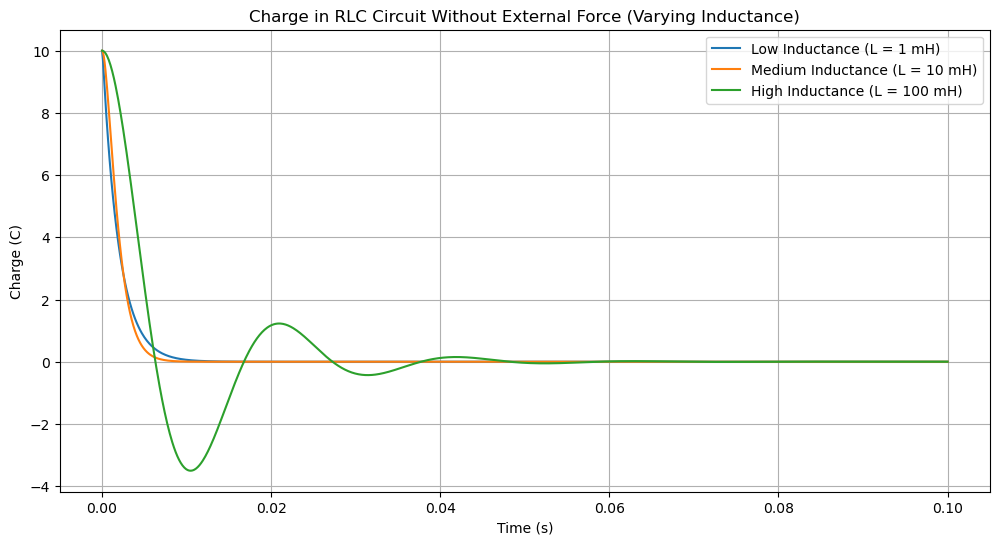

In [1]:
# Reimport necessary libraries after reset
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters for RLC circuit without external force (no sinusoidal source)
C = 100e-6  # Capacitance in farads
q0, i0 = 1e1, 0  # Initial charge and current (non-zero initial charge)
R = 20  # Fixed resistance

# Time span for simulation
t_span = (0, 0.1)  # 100 ms
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Inductance values for different damping conditions
inductances_no_force = {
    "Low Inductance (L = 1 mH)": 1e-3,
    "Medium Inductance (L = 10 mH)": 10e-3,
    "High Inductance (L = 100 mH)": 100e-3,
}

# Define the RLC ODE for no external force
def rlc_no_force_ode(t, y, R, L, C):
    q, i = y  # q = charge, i = current
    dqdt = i
    didt = -(R * i + q / C) / L
    return [dqdt, didt]

# Plotting the charge vs time for different inductance values (no external force)
plt.figure(figsize=(12, 6))

for label, L in inductances_no_force.items():
    sol = solve_ivp(rlc_no_force_ode, t_span, [q0, i0], args=(R, L, C), t_eval=t_eval, method='RK45')
    plt.plot(sol.t, sol.y[0], label=label)  # Charge (y[0])

plt.title("Charge in RLC Circuit Without External Force (Varying Inductance)")
plt.xlabel("Time (s)")
plt.ylabel("Charge (C)")
plt.legend(loc="best")
plt.grid(True)
plt.show()


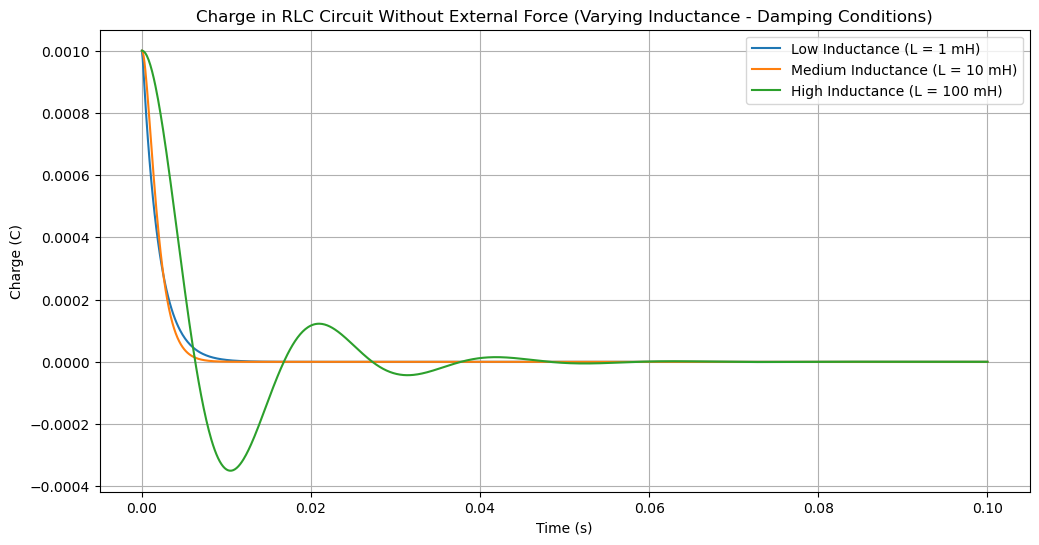

In [3]:
# Parameters for RLC circuit without external force
C = 100e-6  # Capacitance in farads
q0, i0 = 1e-3, 0  # Initial charge and current (non-zero initial charge)
R = 20  # Fixed resistance

# Time span for simulation
t_span = (0, 0.1)  # 100 ms
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Inductance values for different damping conditions
inductances_damping = {
    "Low Inductance (L = 1 mH)": 1e-3,
    "Medium Inductance (L = 10 mH)": 10e-3,
    "High Inductance (L = 100 mH)": 100e-3,
}

# Define the RLC ODE for no external force
def rlc_no_force_ode(t, y, R, L, C):
    q, i = y  # q = charge, i = current
    dqdt = i
    didt = -(R * i + q / C) / L
    return [dqdt, didt]

# Plotting the charge vs time for different inductance values (no external force)
plt.figure(figsize=(12, 6))

for label, L in inductances_damping.items():
    sol = solve_ivp(rlc_no_force_ode, t_span, [q0, i0], args=(R, L, C), t_eval=t_eval, method='RK45')
    plt.plot(sol.t, sol.y[0], label=label)  # Charge (y[0])

plt.title("Charge in RLC Circuit Without External Force (Varying Inductance - Damping Conditions)")
plt.xlabel("Time (s)")
plt.ylabel("Charge (C)")
plt.legend(loc="best")
plt.grid(True)
plt.show()


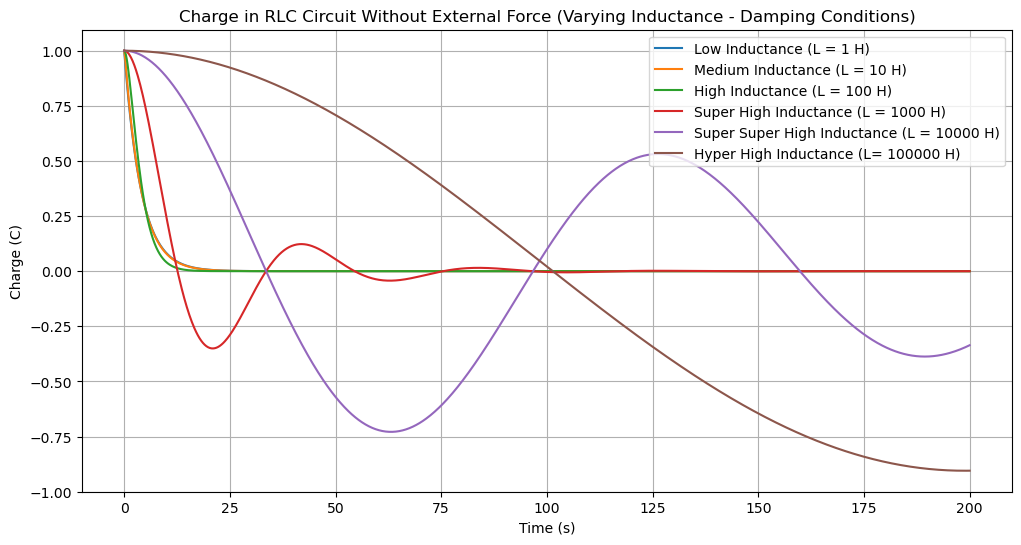

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters for RLC circuit without external force
C = 0.04  # Capacitance in farads
q0, i0 = 1, 0  # Initial charge and current (non-zero initial charge)
R = 100  # Fixed resistance

# Time span for simulation
t_span = (0, 200)  # 100 ms
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Inductance values for different damping conditions
inductances_damping = {
    "Low Inductance (L = 1 H)": 1e0,
    "Medium Inductance (L = 10 H)": 1e1,
    "High Inductance (L = 100 H)": 1e2,
    "Super High Inductance (L = 1000 H)": 1e3,
    "Super Super High Inductance (L = 10000 H)": 1e4,
    "Hyper High Inductance (L= 100000 H)": 1e5,
}

# Define the RLC ODE for no external force
def rlc_no_force_ode(t, y, R, L, C):
    q, i = y  # q = charge, i = current
    dqdt = i
    didt = -(R * i + q / C) / L
    return [dqdt, didt]

# Plotting the charge vs time for different inductance values (no external force)
plt.figure(figsize=(12, 6))

for label, L in inductances_damping.items():
    sol = solve_ivp(rlc_no_force_ode, t_span, [q0, i0], args=(R, L, C), t_eval=t_eval, method='RK45')
    plt.plot(sol.t, sol.y[0], label=label)  # Charge (y[0])

plt.title("Charge in RLC Circuit Without External Force (Varying Inductance - Damping Conditions)")
plt.xlabel("Time (s)")
plt.ylabel("Charge (C)")
plt.legend(loc="best")
plt.grid(True)
plt.show()


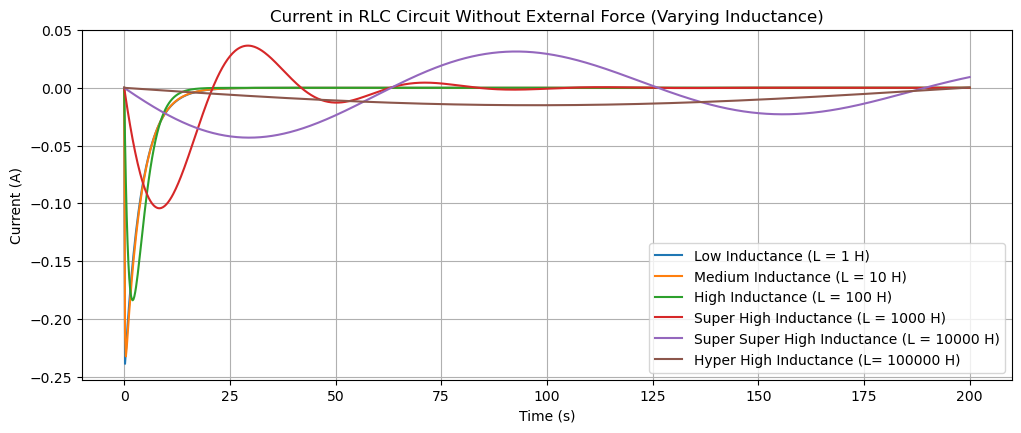

In [12]:
# Reimport necessary libraries after reset
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define functions for energy calculations
def electrical_energy(q, C):
    """Electrical energy stored in the capacitor."""
    return 0.5 * (q ** 2) / C

def magnetic_energy(i, L):
    """Magnetic energy stored in the inductor."""
    return 0.5 * L * (i ** 2)

# Define the RLC ODE for no external force
def rlc_no_force_ode(t, y, R, L, C):
    q, i = y  # q = charge, i = current
    dqdt = i
    didt = -(R * i + q / C) / L
    return [dqdt, didt]

# Parameters for RLC circuit without external force
C = 0.04  # Capacitance in farads
q0, i0 = 1, 0  # Initial charge and current (non-zero initial charge)
R = 100  # Fixed resistance

# Time span for simulation
t_span = (0, 200)  # Simulation over 200 seconds
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Inductance values for different damping conditions
inductances_damping = {
    "Low Inductance (L = 1 H)": 1e0,
    "Medium Inductance (L = 10 H)": 1e1,
    "High Inductance (L = 100 H)": 1e2,
    "Super High Inductance (L = 1000 H)": 1e3,
    "Super Super High Inductance (L = 10000 H)": 1e4,
    "Hyper High Inductance (L= 100000 H)": 1e5,
}

# Plotting current and energy for different inductance values
plt.figure(figsize=(12, 10))

# Current (velocity equivalent in RLC)
plt.subplot(2, 1, 1)
for label, L in inductances_damping.items():
    sol = solve_ivp(rlc_no_force_ode, t_span, [q0, i0], args=(R, L, C), t_eval=t_eval, method='RK45')
    current = sol.y[1]  # Current is the second state variable
    plt.plot(sol.t, current, label=label)  # Plot current for each inductance

plt.title("Current in RLC Circuit Without External Force (Varying Inductance)")
plt.xlabel("Time (s)")
plt.ylabel("Current (A)")
plt.legend(loc="best")
plt.grid(True)


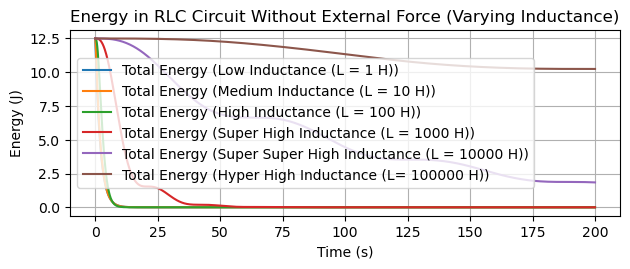

In [13]:

# Energy (Electrical and Magnetic)
plt.subplot(2, 1, 2)
for label, L in inductances_damping.items():
    sol = solve_ivp(rlc_no_force_ode, t_span, [q0, i0], args=(R, L, C), t_eval=t_eval, method='RK45')
    q = sol.y[0]  # Charge
    i = sol.y[1]  # Current
    e_energy = electrical_energy(q, C)
    m_energy = magnetic_energy(i, L)
    total_energy = e_energy + m_energy  # Total energy
    
    # Plot total energy for each inductance
    plt.plot(sol.t, total_energy, label=f"Total Energy ({label})")

plt.title("Energy in RLC Circuit Without External Force (Varying Inductance)")
plt.xlabel("Time (s)")
plt.ylabel("Energy (J)")
plt.legend(loc="best")
plt.grid(True)

plt.tight_layout()
plt.show()


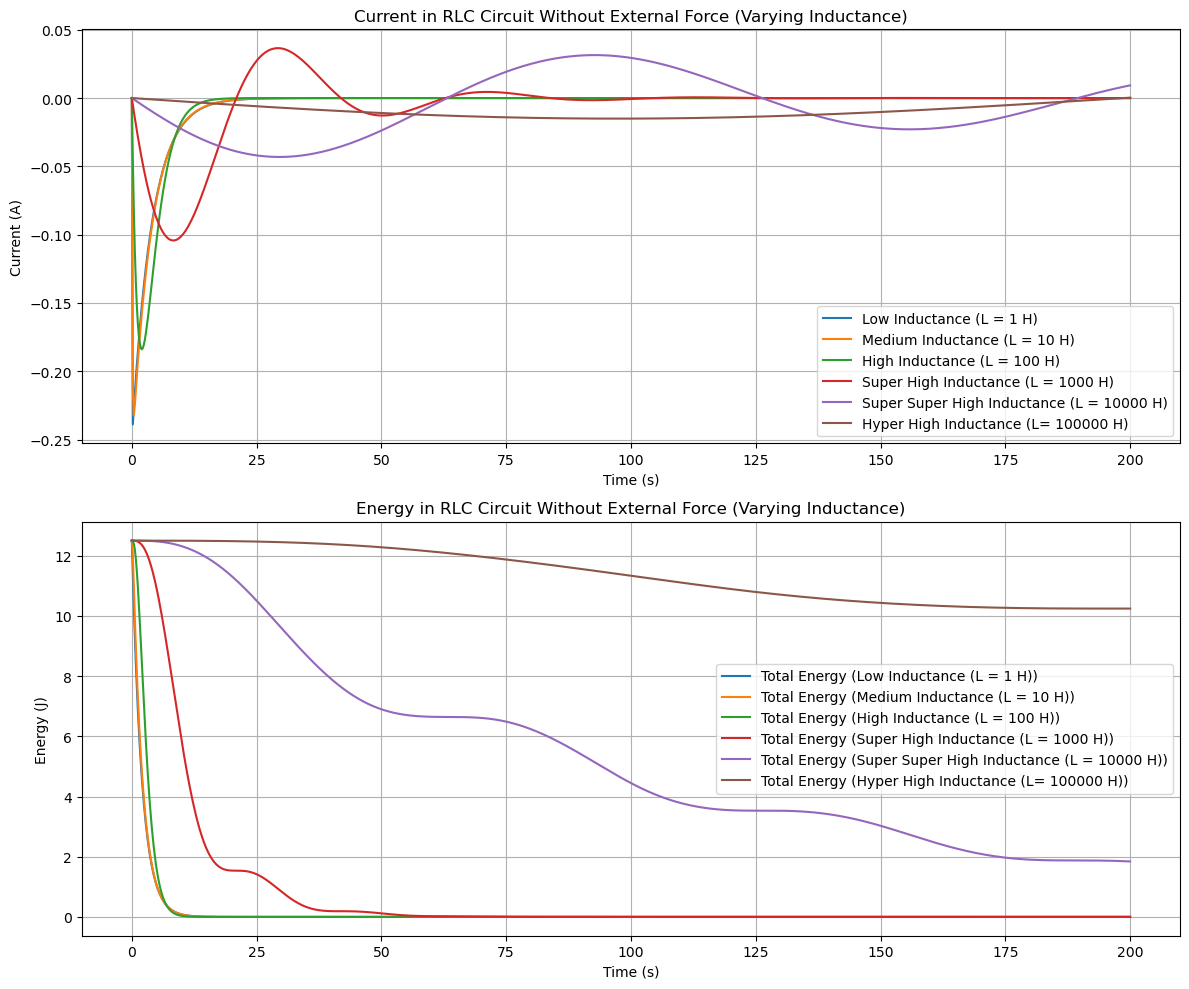

In [15]:
# Reimport necessary libraries after reset
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define functions for energy calculations
def electrical_energy(q, C):
    """Electrical energy stored in the capacitor."""
    return 0.5 * (q ** 2) / C

def magnetic_energy(i, L):
    """Magnetic energy stored in the inductor."""
    return 0.5 * L * (i ** 2)

# Define the RLC ODE for no external force
def rlc_no_force_ode(t, y, R, L, C):
    q, i = y  # q = charge, i = current
    dqdt = i
    didt = -(R * i + q / C) / L
    return [dqdt, didt]

# Parameters for RLC circuit without external force
C = 0.04  # Capacitance in farads
q0, i0 = 1, 0  # Initial charge and current (non-zero initial charge)
R = 100  # Fixed resistance

# Time span for simulation
t_span = (0, 200)  # Simulation over 200 seconds
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Inductance values for different damping conditions
inductances_damping = {
    "Low Inductance (L = 1 H)": 1e0,
    "Medium Inductance (L = 10 H)": 1e1,
    "High Inductance (L = 100 H)": 1e2,
    "Super High Inductance (L = 1000 H)": 1e3,
    "Super Super High Inductance (L = 10000 H)": 1e4,
    "Hyper High Inductance (L= 100000 H)": 1e5,
}

# Plotting current and energy for different inductance values
plt.figure(figsize=(12, 10))

# Current (velocity equivalent in RLC)
plt.subplot(2, 1, 1)
for label, L in inductances_damping.items():
    sol = solve_ivp(rlc_no_force_ode, t_span, [q0, i0], args=(R, L, C), t_eval=t_eval, method='RK45')
    current = sol.y[1]  # Current is the second state variable
    plt.plot(sol.t, current, label=label)  # Plot current for each inductance

plt.title("Current in RLC Circuit Without External Force (Varying Inductance)")
plt.xlabel("Time (s)")
plt.ylabel("Current (A)")
plt.legend(loc="best")
plt.grid(True)

# Energy (Electrical and Magnetic)
plt.subplot(2, 1, 2)
for label, L in inductances_damping.items():
    sol = solve_ivp(rlc_no_force_ode, t_span, [q0, i0], args=(R, L, C), t_eval=t_eval, method='RK45')
    q = sol.y[0]  # Charge
    i = sol.y[1]  # Current
    e_energy = electrical_energy(q, C)
    m_energy = magnetic_energy(i, L)
    total_energy = e_energy + m_energy  # Total energy
    
    # Plot total energy for each inductance
    plt.plot(sol.t, total_energy, label=f"Total Energy ({label})")

plt.title("Energy in RLC Circuit Without External Force (Varying Inductance)")
plt.xlabel("Time (s)")
plt.ylabel("Energy (J)")
plt.legend(loc="best")
plt.grid(True)

plt.tight_layout()
plt.show()


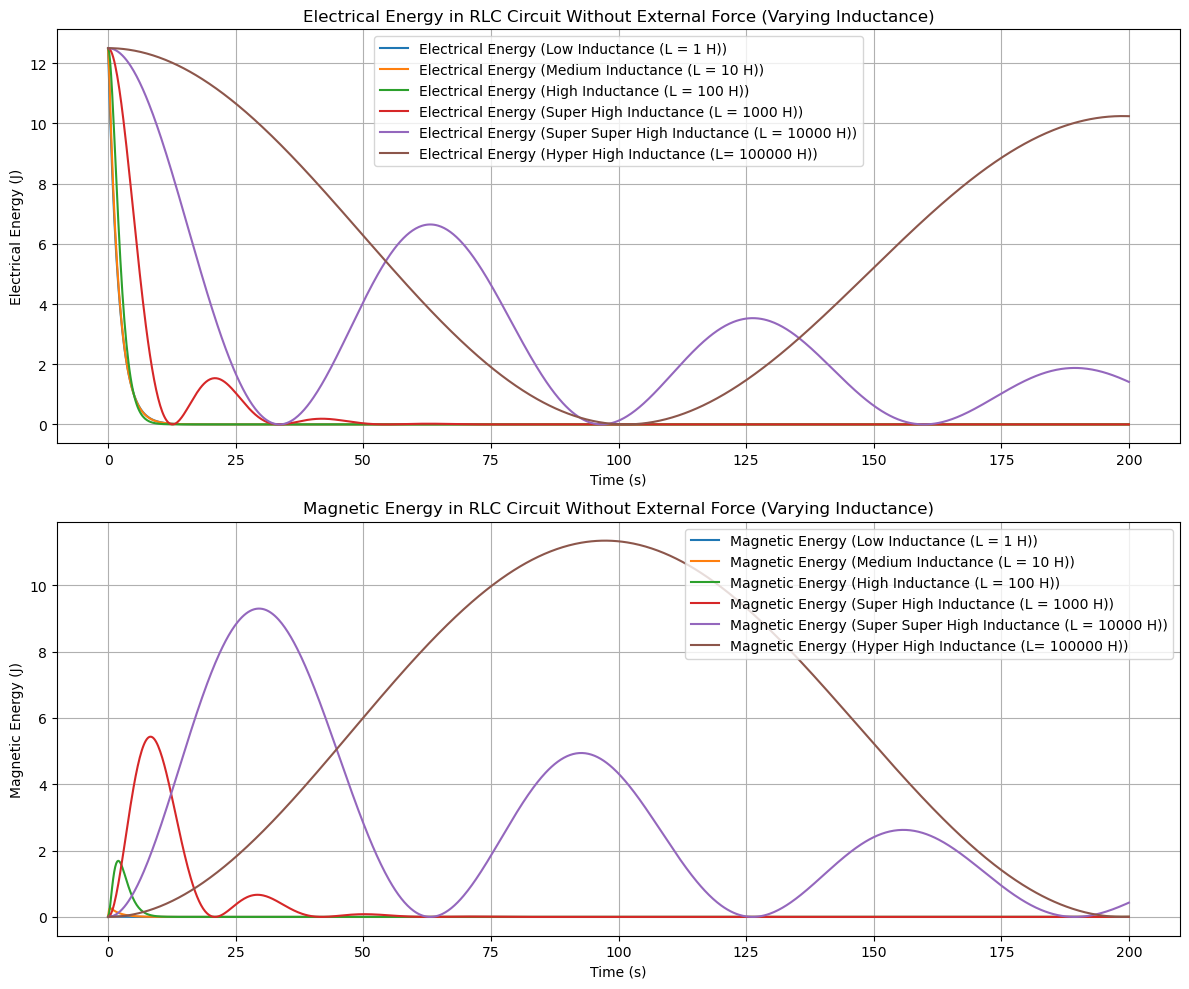

In [16]:
# Plotting electrical and magnetic energy separately for different inductance values
plt.figure(figsize=(12, 10))

# Electrical Energy
plt.subplot(2, 1, 1)
for label, L in inductances_damping.items():
    sol = solve_ivp(rlc_no_force_ode, t_span, [q0, i0], args=(R, L, C), t_eval=t_eval, method='RK45')
    q = sol.y[0]  # Charge
    e_energy = electrical_energy(q, C)  # Electrical energy stored in the capacitor
    plt.plot(sol.t, e_energy, label=f"Electrical Energy ({label})")

plt.title("Electrical Energy in RLC Circuit Without External Force (Varying Inductance)")
plt.xlabel("Time (s)")
plt.ylabel("Electrical Energy (J)")
plt.legend(loc="best")
plt.grid(True)

# Magnetic Energy
plt.subplot(2, 1, 2)
for label, L in inductances_damping.items():
    sol = solve_ivp(rlc_no_force_ode, t_span, [q0, i0], args=(R, L, C), t_eval=t_eval, method='RK45')
    i = sol.y[1]  # Current
    m_energy = magnetic_energy(i, L)  # Magnetic energy stored in the inductor
    plt.plot(sol.t, m_energy, label=f"Magnetic Energy ({label})")

plt.title("Magnetic Energy in RLC Circuit Without External Force (Varying Inductance)")
plt.xlabel("Time (s)")
plt.ylabel("Magnetic Energy (J)")
plt.legend(loc="best")
plt.grid(True)

plt.tight_layout()
plt.show()
